# CESI HumanForYou

## Préparation de l'environnement

## Imports des librairies


In [131]:
# imports
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng
from datetime import datetime

Affichage des graphs

In [132]:
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
plt.rcParams['figure.figsize'] = [15,10] 
plt.rcParams["figure.dpi"] = 250
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# où sauver les figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings('ignore')

## Import des données

In [133]:
#Import des données depuis Github de Anthony Lorendeaux
general_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/general_data.csv"
manager_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/manager_survey_data.csv"
employee_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/employee_survey_data.csv"
in_time_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/in_time.csv"
out_time_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/out_time.csv"

#Lecture des csv
general_info_data = pd.read_csv(general_url)
manager_survey_data = pd.read_csv(manager_url)
employee_survey_data = pd.read_csv(employee_url)
in_time_data = pd.read_csv(in_time_url)
out_time_data = pd.read_csv(out_time_url)

## Visualisation des données
Dans un premier temps, nous pouvons observer les premières lignes de notre dataset en utilisant la méthode **head()**, afin de vérifier que l'import se soit bien passé.

In [134]:
general_info_data.head(1)

Age Attrition BusinessTravel Department  DistanceFromHome  Education  \
0   51        No  Travel_Rarely      Sales                 6          2   

  EducationField  EmployeeCount  EmployeeID  Gender  ...  NumCompaniesWorked  \
0  Life Sciences              1           1  Female  ...                 1.0   

  Over18 PercentSalaryHike  StandardHours  StockOptionLevel TotalWorkingYears  \
0      Y                11              8                 0               1.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   

   YearsWithCurrManager  
0                     0  

[1 rows x 24 columns]

Nous pouvons obtenir une description du dataset avec la méthode **info()**. 
Ce qui nous permettra de repérer les attributs contenant des données vides et de connaitre le type des valeurs de chaque attribut.

La fonction **shape()** quand à elle nous permet combien de ligne et de colonne nous avons dans notre csv.

In [135]:
print('Shape of in_time :',general_info_data.shape)
general_info_data.info()

Shape of in_time : (4410, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  

In [136]:
manager_survey_data.head(1)

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3

In [137]:
print('Shape of in_time :',manager_survey_data.shape)
manager_survey_data.info()

Shape of in_time : (4410, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [138]:
employee_survey_data.head(1)

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0

In [139]:
print('Shape of in_time :',employee_survey_data.shape)
employee_survey_data.info()

Shape of in_time : (4410, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [140]:
in_time_data.head(1)

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   

   2015-12-18           2015-12-21           2015-12-22           2015-12-23  \
0         NaN  2015-12-21 09:55:29  2015-12-22 10:04:06  2015-12-23 10:14:27   

            2015-12-24 2015-12-25           2015-12-28           2015-12-29  \
0  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41  2015-12-29 10:03:36   

            2015-12-30           2015-12-31  
0  2015-12-30 09:54:12  2015-12-31 10:12:44  

[1 rows x 262 columns]

In [141]:
print('Shape of in_time :',in_time_data.shape)
in_time_data.info()

Shape of in_time : (4410, 262)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [142]:
out_time_data.head(1)

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   

   2015-12-18           2015-12-21           2015-12-22           2015-12-23  \
0         NaN  2015-12-21 17:15:50  2015-12-22 17:27:51  2015-12-23 16:44:44   

            2015-12-24 2015-12-25           2015-12-28           2015-12-29  \
0  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07  2015-12-29 17:22:30   

            2015-12-30           2015-12-31  
0  2015-12-30 17:40:56  2015-12-31 17:17:33  

[1 rows x 262 columns]

In [143]:
print('Shape of in_time :',out_time_data.shape)
out_time_data.info()

Shape of in_time : (4410, 262)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


## Transformation des données

Les données de temps ne sont pas exploitables dans l'état actuel des choses, il faut donc les retravailler.
Les ddonnées sont pas expoitables il faut les tranformer.

Avoir des heures d'entrées et de sortie de nos employés n'est pas trop significatifs, c'est pour cela que l' on va remplacer tous les valeurs par la moyenne de temps de travail de chaque employé.

Mais : 
Les dates sont stockées en tant que chaine de caractère et c'est compliqué de les exploiter.
Certaines données valent (NaN), ce qui veut dire qu'un employé a été absent au travail
Il faut les transformer en objet datetime.

Lorsqu'un employé est absent au travail, son temps moyen de travail est de 0 donc on peut remplacer les NaN par 0.

D'abord on va rename la colonne Unnamed qui correspond à nos ID de nos employés puisque dans csv on a le même nombre de ligne que sur les autres csv.

In [144]:
#On rename nos colonnes Unnamed de nos csv in et out
in_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
in_time_data.set_index('EmployeeID', inplace=True)
in_time_data
out_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_data.set_index('EmployeeID', inplace=True)

# On enlève les colonnes de vacances(là où il y a que des NaN) et donc là ou l'employé a été absent
in_time_data=in_time_data.dropna(axis=1,how='all')
out_time_data=out_time_data.dropna(axis=1,how='all')
#On remplace les NaN par 0
in_time_data.fillna(0, inplace=True)
out_time_data.fillna(0, inplace=True)

out_time_data.head()


2015-01-02           2015-01-05           2015-01-06  \
EmployeeID                                                                  
1           2015-01-02 16:56:15  2015-01-05 17:20:11  2015-01-06 17:19:05   
2           2015-01-02 18:22:17  2015-01-05 17:48:22                    0   
3           2015-01-02 16:59:14  2015-01-05 17:06:46  2015-01-06 16:38:32   
4           2015-01-02 17:25:24  2015-01-05 17:14:03  2015-01-06 17:07:42   
5           2015-01-02 18:31:37  2015-01-05 17:49:15  2015-01-06 17:26:25   

                     2015-01-07           2015-01-08           2015-01-09  \
EmployeeID                                                                  
1           2015-01-07 16:34:55  2015-01-08 17:08:32  2015-01-09 17:38:29   
2           2015-01-07 17:09:06  2015-01-08 17:34:04  2015-01-09 16:52:29   
3           2015-01-07 16:33:21  2015-01-08 17:24:22  2015-01-09 16:57:30   
4           2015-01-07 16:32:40  2015-01-08 16:53:11  2015-01-09 17:19:47   
5           2015-01-07 17:37:59  2015-01-08 17:59:28  2015-01-09 17:44:08   

                     2015-01-12           2015-01-13           2015-01-15  \
EmployeeID                                                                  
1           2015-01-12 16:58:39  2015-01-13 18:02:58  2015-01-15 17:22:13   
2           2015-01-12 17:36:48  2015-01-13 18:00:13  2015-01-15 17:14:44   
3           2015-01-12 17:28:54  2015-01-13 17:21:25  2015-01-15 17:21:29   
4           2015-01-12 17:13:37  2015-01-13 17:11:45  2015-01-15 16:53:26   
5           2015-01-12 18:51:21  2015-01-13 18:14:58  2015-01-15 18:21:48   

                     2015-01-16  ...           2015-12-17  \
EmployeeID                       ...                        
1           2015-01-16 17:35:11  ...                    0   
2           2015-01-16 17:40:57  ...  2015-12-17 17:10:50   
3           2015-01-16 17:18:13  ...  2015-12-17 17:06:23   
4           2015-01-16 16:52:34  ...  2015-12-17 17:21:57   
5           2015-01-16 18:28:03  ...  2015-12-17 18:05:47   

                     2015-12-18           2015-12-21           2015-12-22  \
EmployeeID                                                                  
1                             0  2015-12-21 17:15:50  2015-12-22 17:27:51   
2           2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
3           2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
4           2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
5           2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

                     2015-12-23           2015-12-24           2015-12-28  \
EmployeeID                                                                  
1           2015-12-23 16:44:44  2015-12-24 17:47:22  2015-12-28 18:00:07   
2           2015-12-23 17:38:18                    0  2015-12-28 17:08:38   
3           2015-12-23 16:59:43  2015-12-24 16:58:25  2015-12-28 16:43:31   
4           2015-12-23 17:36:35  2015-12-24 16:48:21  2015-12-28 17:19:34   
5           2015-12-23 18:00:49  2015-12-24 17:59:22  2015-12-28 17:44:59   

                     2015-12-29           2015-12-30           2015-12-31  
EmployeeID                                                                 
1           2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
2           2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
3           2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
4           2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
5           2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 249 columns]

On transforme nos chaines de caractère en objets datetime

In [145]:
for date in in_time_data.columns:
    in_time_data[date]=pd.to_datetime(in_time_data[date])
    out_time_data[date]=pd.to_datetime(out_time_data[date])

On calcule dans un nouveau dataset le nombre d'heure passée au travail d'un employé par jour

In [146]:
time_work_per_day=pd.DataFrame()

cols=in_time_data.columns
for col in cols:
    time_work_per_day[col]=((out_time_data[col] - in_time_data[col]).dt.total_seconds() /3600)

time_work_per_day.head()

2015-01-02  2015-01-05  2015-01-06  2015-01-07  2015-01-08  \
EmployeeID                                                               
1             7.208333    7.189722    7.410833    7.006667    7.289722   
2             8.109167    7.454722    0.000000    7.396944    7.416667   
3             6.692500    7.265556    6.405278    6.765000    7.345000   
4             7.338333    7.291944    6.943056    6.919444    6.850833   
5             8.055556    7.988056    7.682500    7.806111    7.662222   

            2015-01-09  2015-01-12  2015-01-13  2015-01-15  2015-01-16  ...  \
EmployeeID                                                              ...   
1             7.484444    7.262778    7.831111    7.346944    7.267500  ...   
2             7.150833    7.611389    7.278889    7.613056    7.727500  ...   
3             6.861389    7.418611    6.999722    7.438333    7.210278  ...   
4             7.193056    6.998611    7.306389    6.876667    6.907778  ...   
5             7.721667    8.365000    8.257222    8.260000    8.403611  ...   

            2015-12-17  2015-12-18  2015-12-21  2015-12-22  2015-12-23  \
EmployeeID                                                               
1             0.000000    0.000000    7.339167    7.395833    6.504722   
2             7.928333    7.903056    7.753889    7.712222    7.435556   
3             7.218333    6.785833    7.163611    6.801667    6.730278   
4             7.455833    7.629167    6.846667    7.326389    7.413611   
5             8.320000    7.903611    7.665000    7.957500    7.786944   

            2015-12-24  2015-12-28  2015-12-29  2015-12-30  2015-12-31  
EmployeeID                                                              
1             7.596389    7.773889    7.315000    7.778889    7.080278  
2             0.000000    7.614722    7.982500    7.986111    8.227222  
3             6.849722    7.023889    7.438889    7.538889    6.786389  
4             7.085000    7.447222    7.416667    7.366389    7.133056  
5             8.249444    7.662222    8.268611    7.953333    8.018056  

[5 rows x 249 columns]

On ajoute ensuite une colonne pour avoir la moyenne de temps passsé au travail par employé sur l'année 2015 et le nombre d'absences au travail par employé durant l'année 2015 et on garde que nos colonnes de la moyenne et des absences sur le dataset

In [147]:
time_work_per_day['MeanTimeWorkOverYear2015']=round(time_work_per_day.astype(int).mean(axis=1),2)
time_work_per_day['absences_par_jour']=(time_work_per_day == 0).astype(int).sum(axis=1)
time_work_per_day = time_work_per_day.drop((time_work_per_day.columns[0:-2]), axis = 1)
time_work_per_day.head()

MeanTimeWorkOverYear2015  absences_par_jour
EmployeeID                                             
1                               6.43                 17
2                               6.79                 13
3                               6.30                  7
4                               6.36                 14
5                               7.35                  4

## Concaténation des données

In [148]:
concat_time_csv = general_info_data.merge(time_work_per_day, on='EmployeeID')
concat_manager_csv = concat_time_csv.merge(manager_survey_data, on='EmployeeID')
temp_concat = concat_manager_csv.merge(employee_survey_data, on='EmployeeID')
temp_concat = temp_concat.set_index('EmployeeID')
temp_concat.describe().T

count          mean           std       min  \
Age                       4410.0     36.923810      9.133301     18.00   
DistanceFromHome          4410.0      9.192517      8.105026      1.00   
Education                 4410.0      2.912925      1.023933      1.00   
EmployeeCount             4410.0      1.000000      0.000000      1.00   
JobLevel                  4410.0      2.063946      1.106689      1.00   
MonthlyIncome             4410.0  65029.312925  47068.888559  10090.00   
NumCompaniesWorked        4391.0      2.694830      2.498887      0.00   
PercentSalaryHike         4410.0     15.209524      3.659108     11.00   
StandardHours             4410.0      8.000000      0.000000      8.00   
StockOptionLevel          4410.0      0.793878      0.851883      0.00   
TotalWorkingYears         4401.0     11.279936      7.782222      0.00   
TrainingTimesLastYear     4410.0      2.799320      1.288978      0.00   
YearsAtCompany            4410.0      7.008163      6.125135      0.00   
YearsSinceLastPromotion   4410.0      2.187755      3.221699      0.00   
YearsWithCurrManager      4410.0      4.123129      3.567327      0.00   
MeanTimeWorkOverYear2015  4410.0      6.839664      1.320894      4.94   
absences_par_jour         4410.0     12.734694      5.503779      1.00   
JobInvolvement            4410.0      2.729932      0.711400      1.00   
PerformanceRating         4410.0      3.153741      0.360742      3.00   
EnvironmentSatisfaction   4385.0      2.723603      1.092756      1.00   
JobSatisfaction           4390.0      2.728246      1.101253      1.00   
WorkLifeBalance           4372.0      2.761436      0.706245      1.00   

                               25%       50%         75%        max  
Age                          30.00     36.00     43.0000      60.00  
DistanceFromHome              2.00      7.00     14.0000      29.00  
Education                     2.00      3.00      4.0000       5.00  
EmployeeCount                 1.00      1.00      1.0000       1.00  
JobLevel                      1.00      2.00      3.0000       5.00  
MonthlyIncome             29110.00  49190.00  83800.0000  199990.00  
NumCompaniesWorked            1.00      2.00      4.0000       9.00  
PercentSalaryHike            12.00     14.00     18.0000      25.00  
StandardHours                 8.00      8.00      8.0000       8.00  
StockOptionLevel              0.00      1.00      1.0000       3.00  
TotalWorkingYears             6.00     10.00     15.0000      40.00  
TrainingTimesLastYear         2.00      3.00      3.0000       6.00  
YearsAtCompany                3.00      5.00      9.0000      40.00  
YearsSinceLastPromotion       0.00      1.00      3.0000      15.00  
YearsWithCurrManager          2.00      3.00      7.0000      17.00  
MeanTimeWorkOverYear2015      5.78      6.55      7.4575      10.47  
absences_par_jour             8.00     13.00     17.0000      24.00  
JobInvolvement                2.00      3.00      3.0000       4.00  
PerformanceRating             3.00      3.00      3.0000       4.00  
EnvironmentSatisfaction       2.00      3.00      4.0000       4.00  
JobSatisfaction               2.00      3.00      4.0000       4.00  
WorkLifeBalance               2.00      3.00      3.0000       4.00

In [149]:
final_data = temp_concat.copy()
final_data[final_data.columns[final_data.isnull().any()]].isnull().sum()

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [150]:
final_data.fillna(round(final_data.median()),inplace=True)
final_data.describe().T

count          mean           std       min  \
Age                       4410.0     36.923810      9.133301     18.00   
DistanceFromHome          4410.0      9.192517      8.105026      1.00   
Education                 4410.0      2.912925      1.023933      1.00   
EmployeeCount             4410.0      1.000000      0.000000      1.00   
JobLevel                  4410.0      2.063946      1.106689      1.00   
MonthlyIncome             4410.0  65029.312925  47068.888559  10090.00   
NumCompaniesWorked        4410.0      2.691837      2.493912      0.00   
PercentSalaryHike         4410.0     15.209524      3.659108     11.00   
StandardHours             4410.0      8.000000      0.000000      8.00   
StockOptionLevel          4410.0      0.793878      0.851883      0.00   
TotalWorkingYears         4410.0     11.277324      7.774490      0.00   
TrainingTimesLastYear     4410.0      2.799320      1.288978      0.00   
YearsAtCompany            4410.0      7.008163      6.125135      0.00   
YearsSinceLastPromotion   4410.0      2.187755      3.221699      0.00   
YearsWithCurrManager      4410.0      4.123129      3.567327      0.00   
MeanTimeWorkOverYear2015  4410.0      6.839664      1.320894      4.94   
absences_par_jour         4410.0     12.734694      5.503779      1.00   
JobInvolvement            4410.0      2.729932      0.711400      1.00   
PerformanceRating         4410.0      3.153741      0.360742      3.00   
EnvironmentSatisfaction   4410.0      2.725170      1.089852      1.00   
JobSatisfaction           4410.0      2.729478      1.098904      1.00   
WorkLifeBalance           4410.0      2.763492      0.703541      1.00   

                               25%       50%         75%        max  
Age                          30.00     36.00     43.0000      60.00  
DistanceFromHome              2.00      7.00     14.0000      29.00  
Education                     2.00      3.00      4.0000       5.00  
EmployeeCount                 1.00      1.00      1.0000       1.00  
JobLevel                      1.00      2.00      3.0000       5.00  
MonthlyIncome             29110.00  49190.00  83800.0000  199990.00  
NumCompaniesWorked            1.00      2.00      4.0000       9.00  
PercentSalaryHike            12.00     14.00     18.0000      25.00  
StandardHours                 8.00      8.00      8.0000       8.00  
StockOptionLevel              0.00      1.00      1.0000       3.00  
TotalWorkingYears             6.00     10.00     15.0000      40.00  
TrainingTimesLastYear         2.00      3.00      3.0000       6.00  
YearsAtCompany                3.00      5.00      9.0000      40.00  
YearsSinceLastPromotion       0.00      1.00      3.0000      15.00  
YearsWithCurrManager          2.00      3.00      7.0000      17.00  
MeanTimeWorkOverYear2015      5.78      6.55      7.4575      10.47  
absences_par_jour             8.00     13.00     17.0000      24.00  
JobInvolvement                2.00      3.00      3.0000       4.00  
PerformanceRating             3.00      3.00      3.0000       4.00  
EnvironmentSatisfaction       2.00      3.00      4.0000       4.00  
JobSatisfaction               2.00      3.00      4.0000       4.00  
WorkLifeBalance               2.00      3.00      3.0000       4.00

## Histogramme 

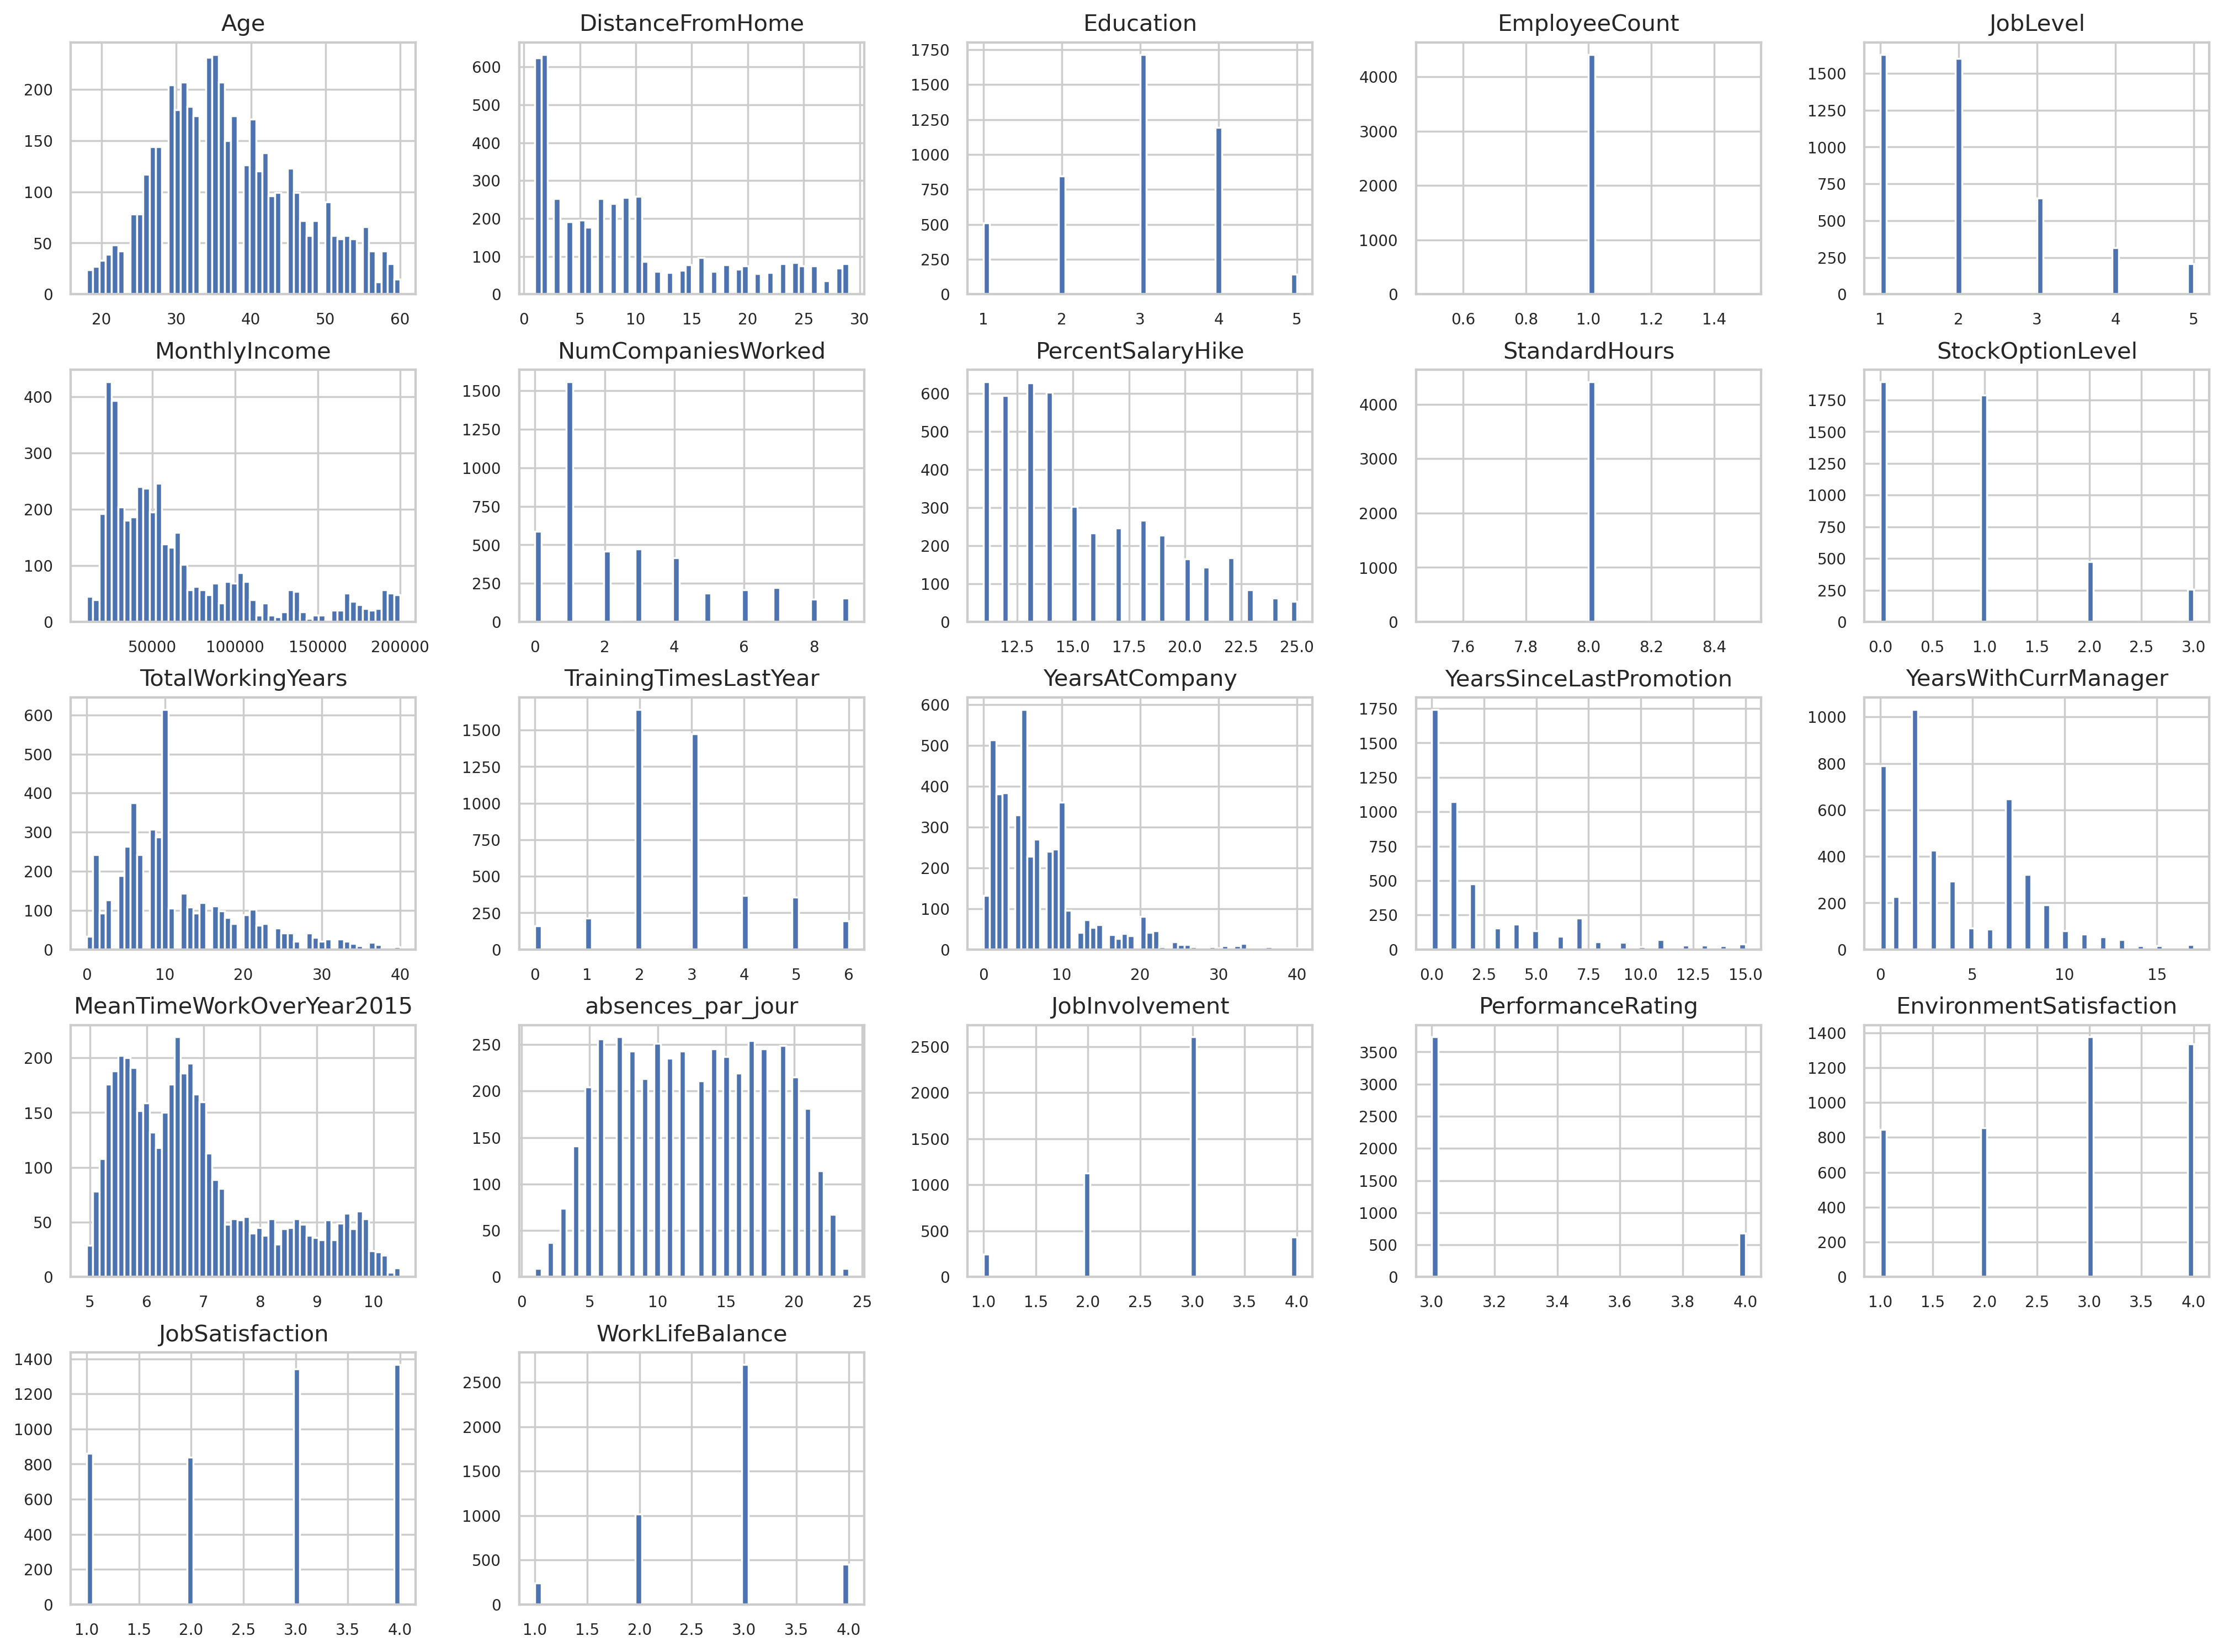

In [151]:
final_data.hist(bins=50, figsize=(20,15))
plt.show()

## Normalisation

In [152]:
# One hot
final_data2 = pd.get_dummies(final_data, 
prefix=["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender"],
columns=["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender"])
final_data2.head(5)



Age Attrition  DistanceFromHome  Education  EmployeeCount  \
EmployeeID                                                              
1            51        No                 6          2              1   
2            31       Yes                10          1              1   
3            32        No                17          4              1   
4            38        No                 2          5              1   
5            32        No                10          1              1   

            JobLevel  MonthlyIncome  NumCompaniesWorked Over18  \
EmployeeID                                                       
1                  1         131160                 1.0      Y   
2                  1          41890                 0.0      Y   
3                  4         193280                 1.0      Y   
4                  3          83210                 3.0      Y   
5                  1          23420                 4.0      Y   

            PercentSalaryHike  ...  JobRole_Manufacturing Director  \
EmployeeID                     ...                                   
1                          11  ...                               0   
2                          23  ...                               0   
3                          15  ...                               0   
4                          11  ...                               0   
5                          12  ...                               0   

            JobRole_Research Director  JobRole_Research Scientist  \
EmployeeID                                                          
1                                   0                           0   
2                                   0                           1   
3                                   0                           0   
4                                   0                           0   
5                                   0                           0   

            JobRole_Sales Executive  JobRole_Sales Representative  \
EmployeeID                                                          
1                                 0                             0   
2                                 0                             0   
3                                 1                             0   
4                                 0                             0   
5                                 1                             0   

            MaritalStatus_Divorced  MaritalStatus_Married  \
EmployeeID                                                  
1                                0                      1   
2                                0                      0   
3                                0                      1   
4                                0                      1   
5                                0                      0   

            MaritalStatus_Single  Gender_Female  Gender_Male  
EmployeeID                                                    
1                              0              1            0  
2                              1              1            0  
3                              0              0            1  
4                              0              0            1  
5                              1              0            1  

[5 rows x 50 columns]

In [153]:
# Delete colums
final_data2.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace = True)
final_data2.head(5)

Age Attrition  DistanceFromHome  Education  JobLevel  \
EmployeeID                                                         
1            51        No                 6          2         1   
2            31       Yes                10          1         1   
3            32        No                17          4         4   
4            38        No                 2          5         3   
5            32        No                10          1         1   

            MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
EmployeeID                                                         
1                  131160                 1.0                 11   
2                   41890                 0.0                 23   
3                  193280                 1.0                 15   
4                   83210                 3.0                 11   
5                   23420                 4.0                 12   

            StockOptionLevel  TotalWorkingYears  ...  \
EmployeeID                                       ...   
1                          0                1.0  ...   
2                          1                6.0  ...   
3                          3                5.0  ...   
4                          3               13.0  ...   
5                          2                9.0  ...   

            JobRole_Manufacturing Director  JobRole_Research Director  \
EmployeeID                                                              
1                                        0                          0   
2                                        0                          0   
3                                        0                          0   
4                                        0                          0   
5                                        0                          0   

            JobRole_Research Scientist  JobRole_Sales Executive  \
EmployeeID                                                        
1                                    0                        0   
2                                    1                        0   
3                                    0                        1   
4                                    0                        0   
5                                    0                        1   

            JobRole_Sales Representative  MaritalStatus_Divorced  \
EmployeeID                                                         
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   
5                                      0                       0   

            MaritalStatus_Married  MaritalStatus_Single  Gender_Female  \
EmployeeID                                                               
1                               1                     0              1   
2                               0                     1              1   
3                               1                     0              0   
4                               1                     0              0   
5                               0                     1              0   

            Gender_Male  
EmployeeID               
1                     0  
2                     0  
3                     1  
4                     1  
5                     1  

[5 rows x 47 columns]

## Statistiques pour l'attrition

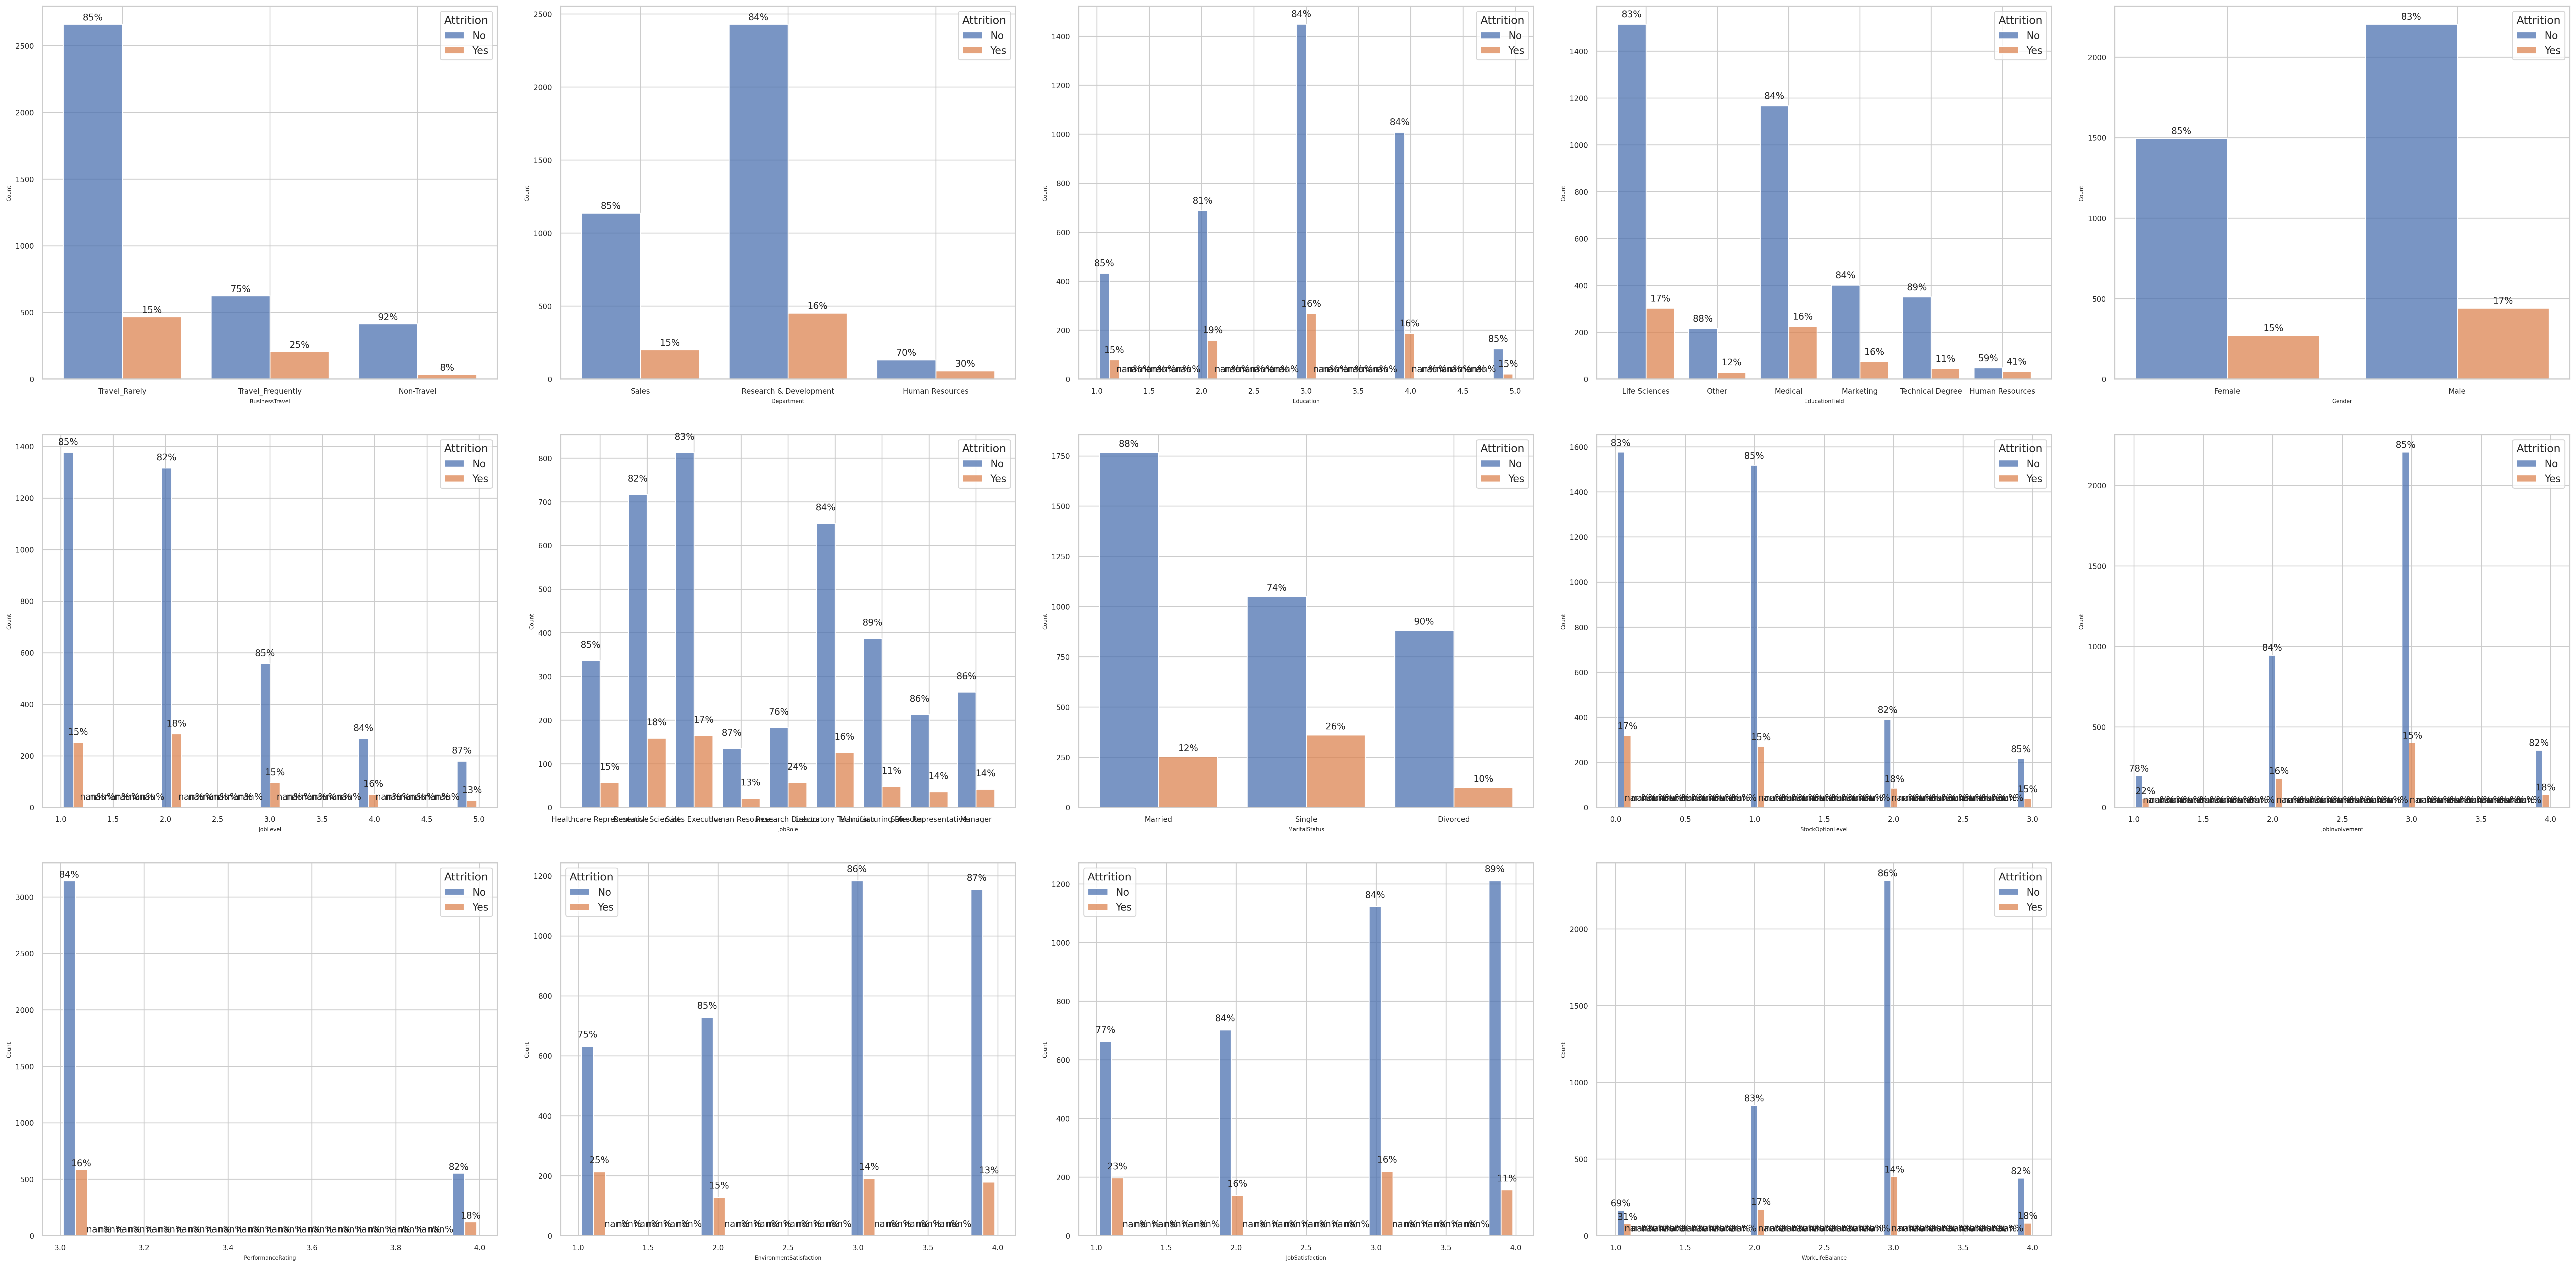

In [206]:
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

plt.figure(figsize=(40,20))
for i, col in enumerate(cols):
    ax = plt.subplot(3, 5, i+1)
    plots = sns.histplot(data=final_data, x=col, ax=ax, hue=final_data['Attrition'], multiple='dodge', shrink=0.8)


    # From axis.patches get bar lengths
    get_bars = plots.patches
    half_bar_length = int(len(get_bars)/2)
    bar_left = get_bars[:half_bar_length]
    bar_right = get_bars[half_bar_length:]
    
    # Place %employees on top of each bar
    for L, R in zip(bar_left, bar_right):
        left_height = L.get_height()
        right_height = R.get_height()
        length_total = left_height + right_height

        # place calculated employee percentage on top of each bar
        ax.text(L.get_x() + L.get_width()/2., left_height + 30, '{0:.0%}'.format(left_height/length_total), ha="center")
        ax.text(R.get_x() + R.get_width()/2., right_height + 30, '{0:.0%}'.format(right_height/length_total), ha="center")
plt.tight_layout(pad=3.0)
plt.show()


In [173]:
cols = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','MeanTimeWorkOverYear2015','absences_par_jour']

plt.figure(figsize=(40,30))
for i, col in enumerate(cols):
    ax = plt.subplot(4, 3, i+1)
    plots = sns.kdeplot(data=final_data, x=col, ax=ax, hue=final_data['Attrition'], shade=True)
    # for bar in plots.patches:
    #     percentage = '{:.1f}%'.format(100 * bar.get_height() / len(final_data[col]))
    #     x = bar.get_x() + bar.get_width() / 2
    #     y = bar.get_height()
    #     plots.annotate(percentage, (x, y),ha='center',va='center',size=15, xytext=(0, 3),
    #                textcoords='offset points')
plt.tight_layout(pad=3.0)
plt.show()

In [179]:
def area_chart(df,feature):
    ax=sns.kdeplot(df[df['Attrition']=='Yes'][feature],
             shade=True,label='Attrition = Yes')
    ax=sns.kdeplot(df[df['Attrition']=='No'][feature],
                 shade=True,label='Attrition = No')
    ax.legend()

In [181]:
cols = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','MeanTimeWorkOverYear2015','absences_par_jour']

plt.figure(figsize=(40,30))
for i, col in enumerate(cols):
    ax = plt.subplot(4, 3, i+1)
    area_chart(final_data, col)
    # for bar in plots.patches:
    #     percentage = '{:.1f}%'.format(100 * bar.get_height() / len(final_data[col]))
    #     x = bar.get_x() + bar.get_width() / 2
    #     y = bar.get_height()
    #     plots.annotate(percentage, (x, y),ha='center',va='center',size=15, xytext=(0, 3),
    #                textcoords='offset points')
plt.tight_layout(pad=3.0)
plt.show()

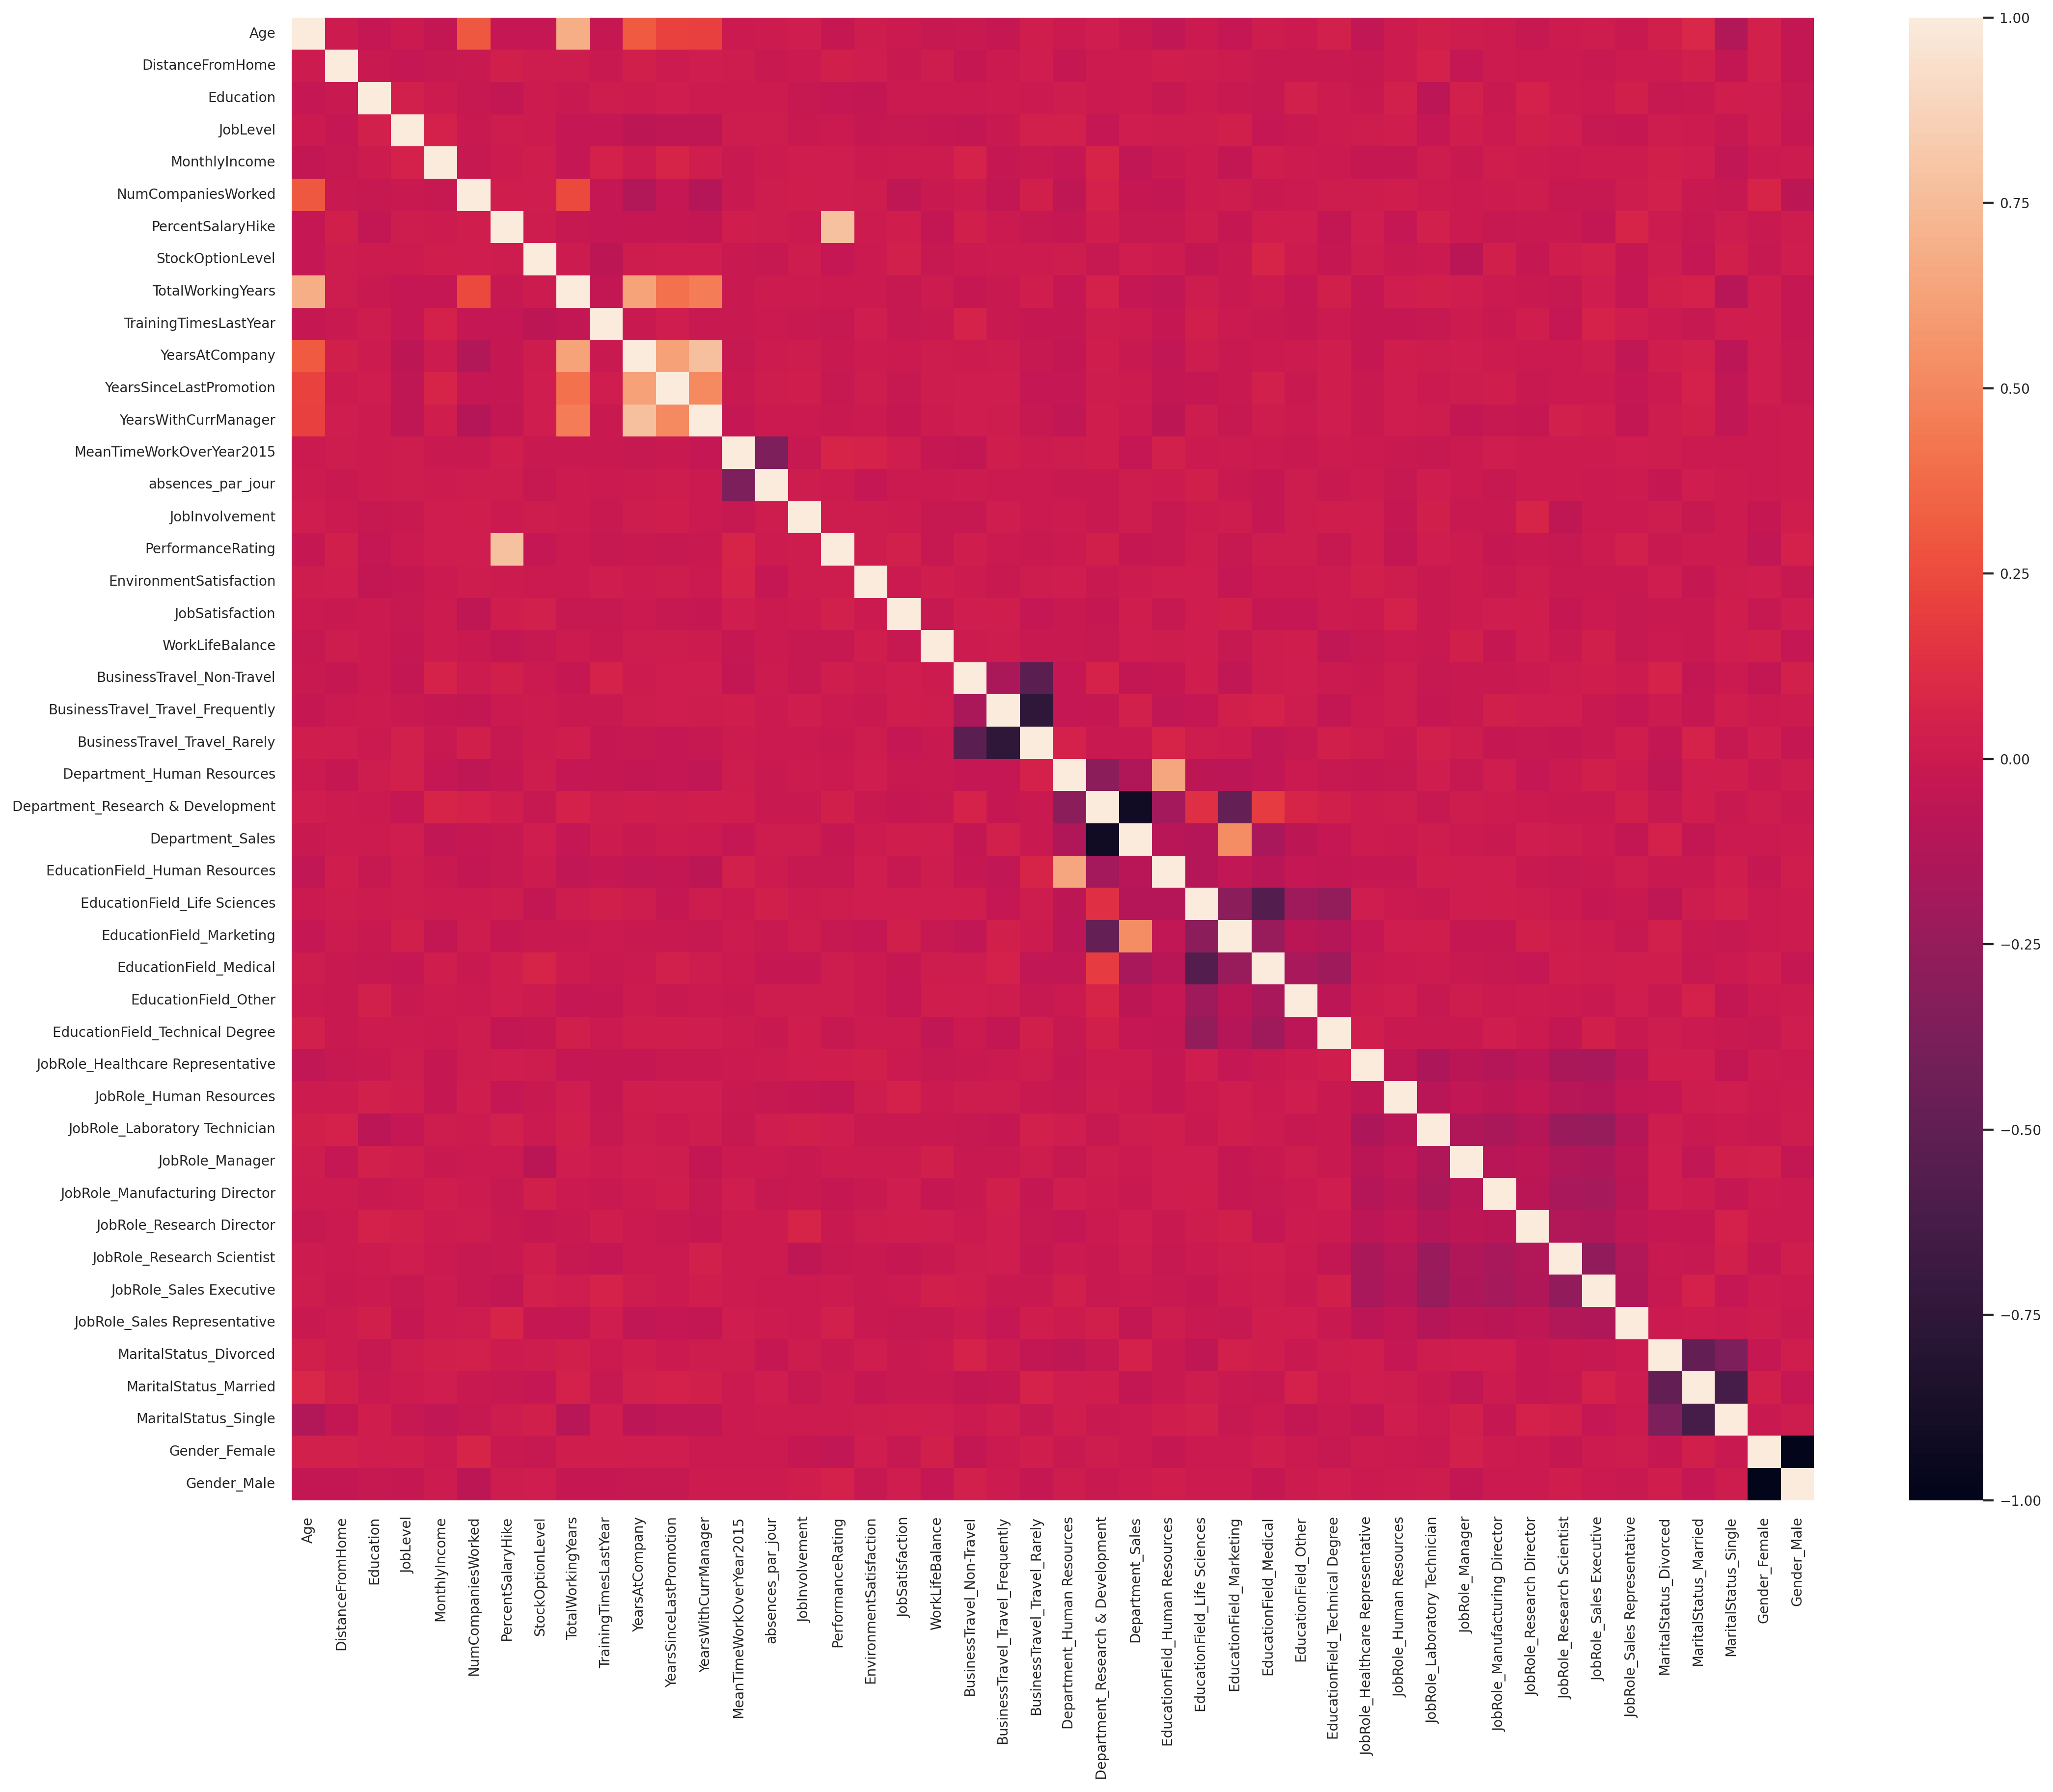

In [155]:
# Matrice de corrélation
corr_matrix = final_data2.corr(method="pearson")

plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, cbar=True)
plt.show()